In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1WrbvqsWUUlqFStXHyFmrzBmr-1E99lf9')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


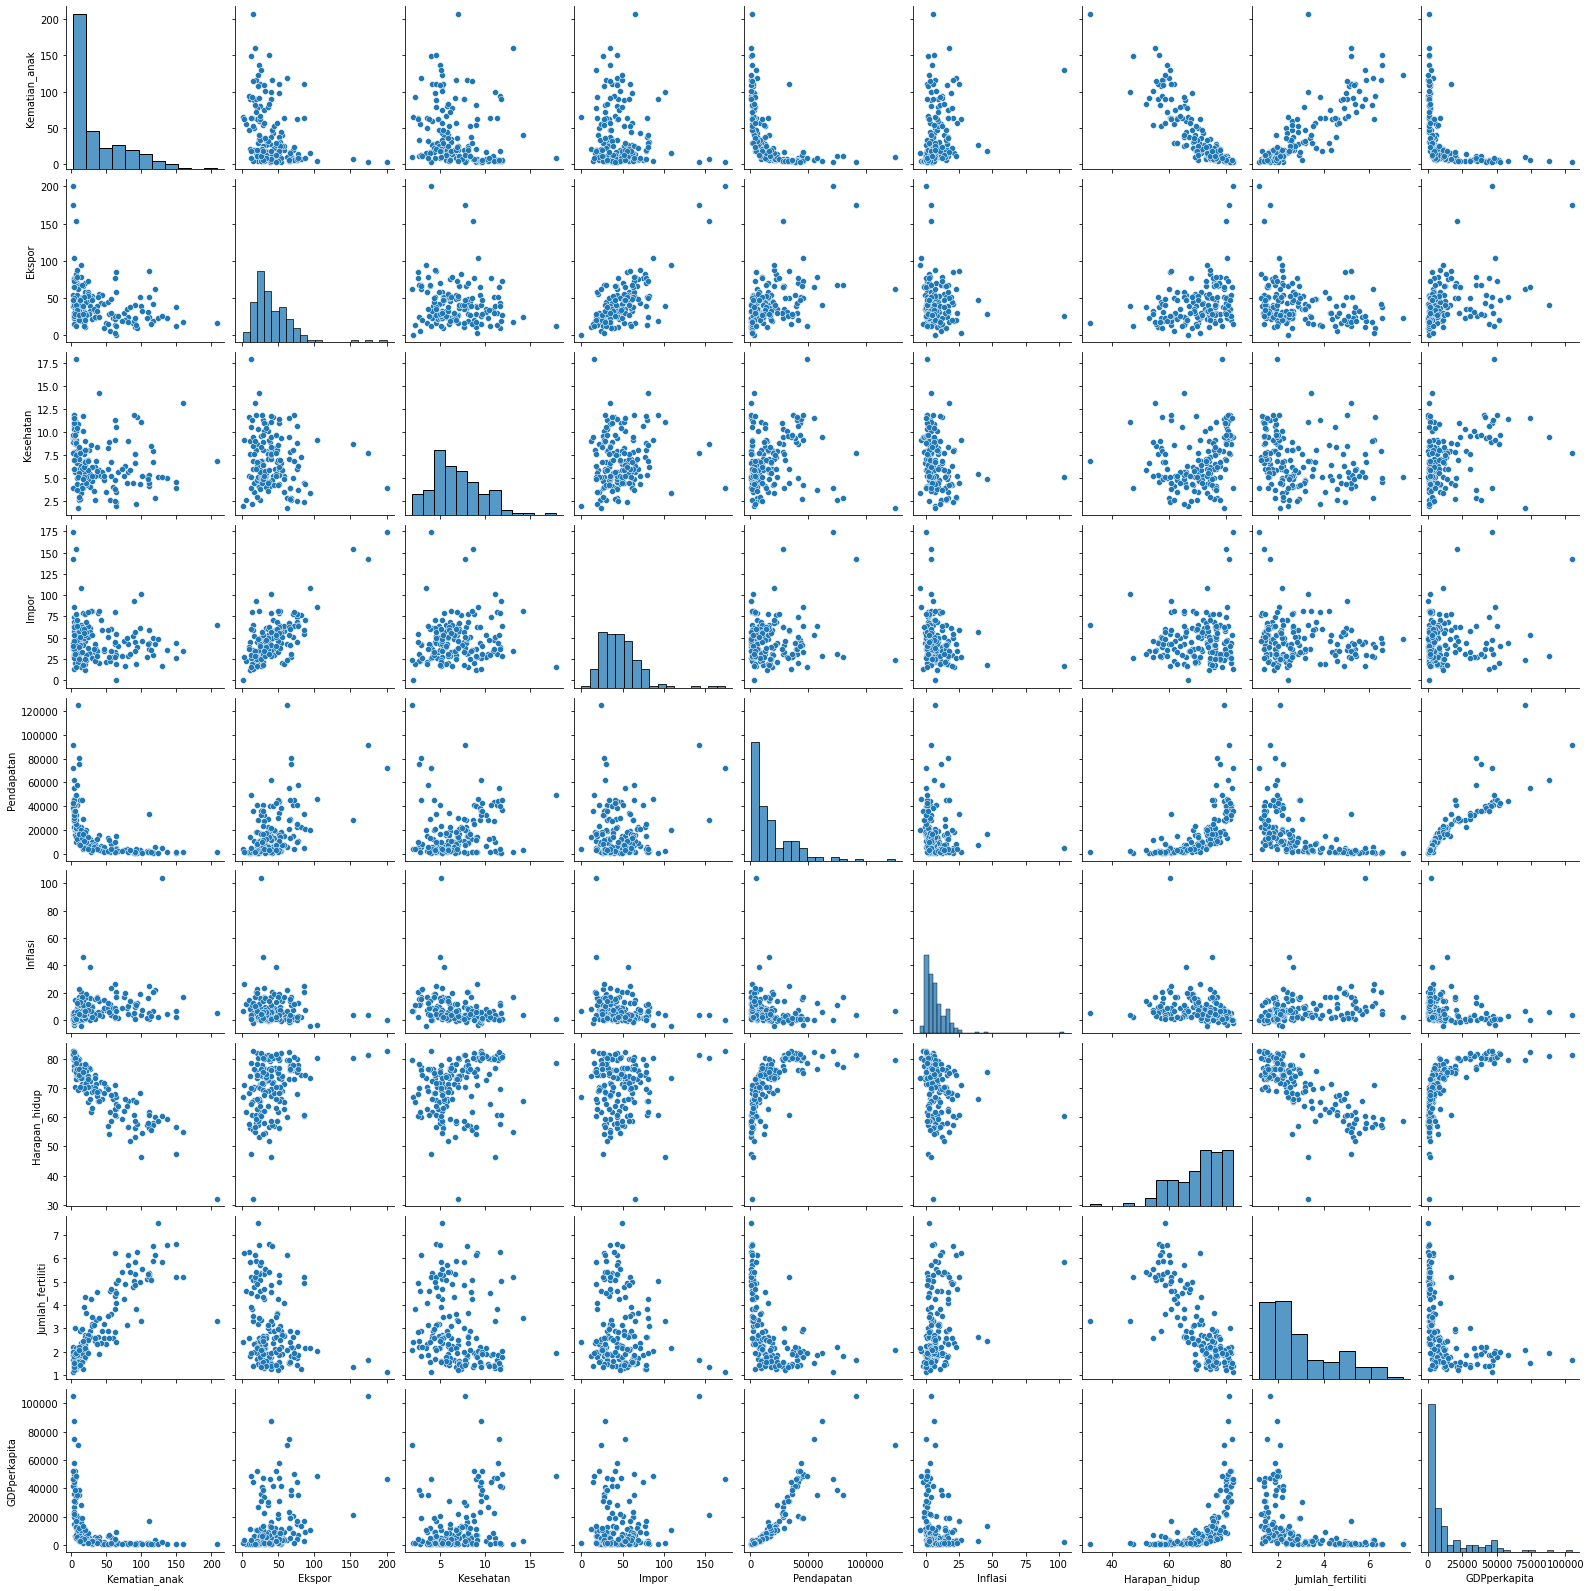

In [5]:
sns.pairplot(df)

In [6]:
df1 = df.copy()
df1.drop(columns=['Negara'], inplace=True)

In [7]:
df1.head()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


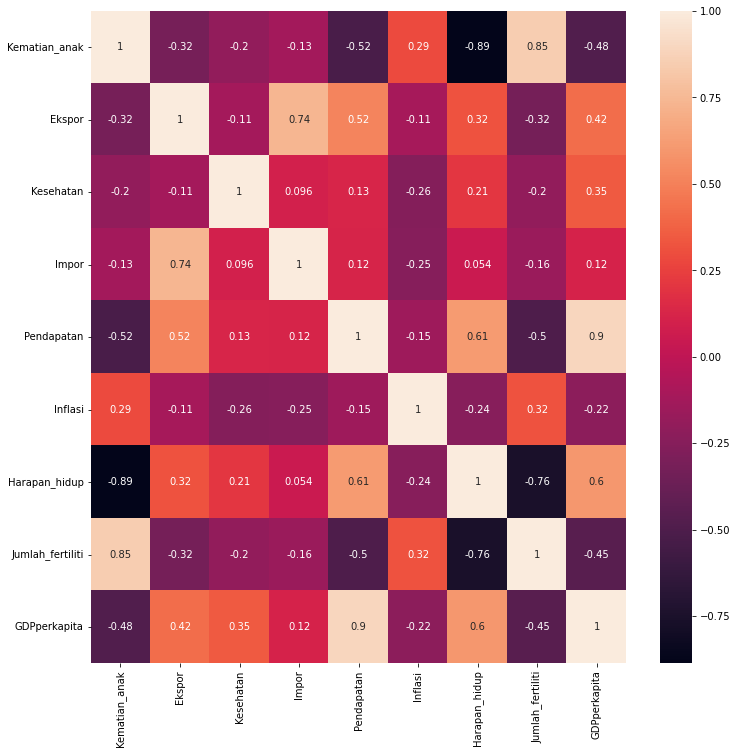

In [8]:
#melihat korelasi antar fitur
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

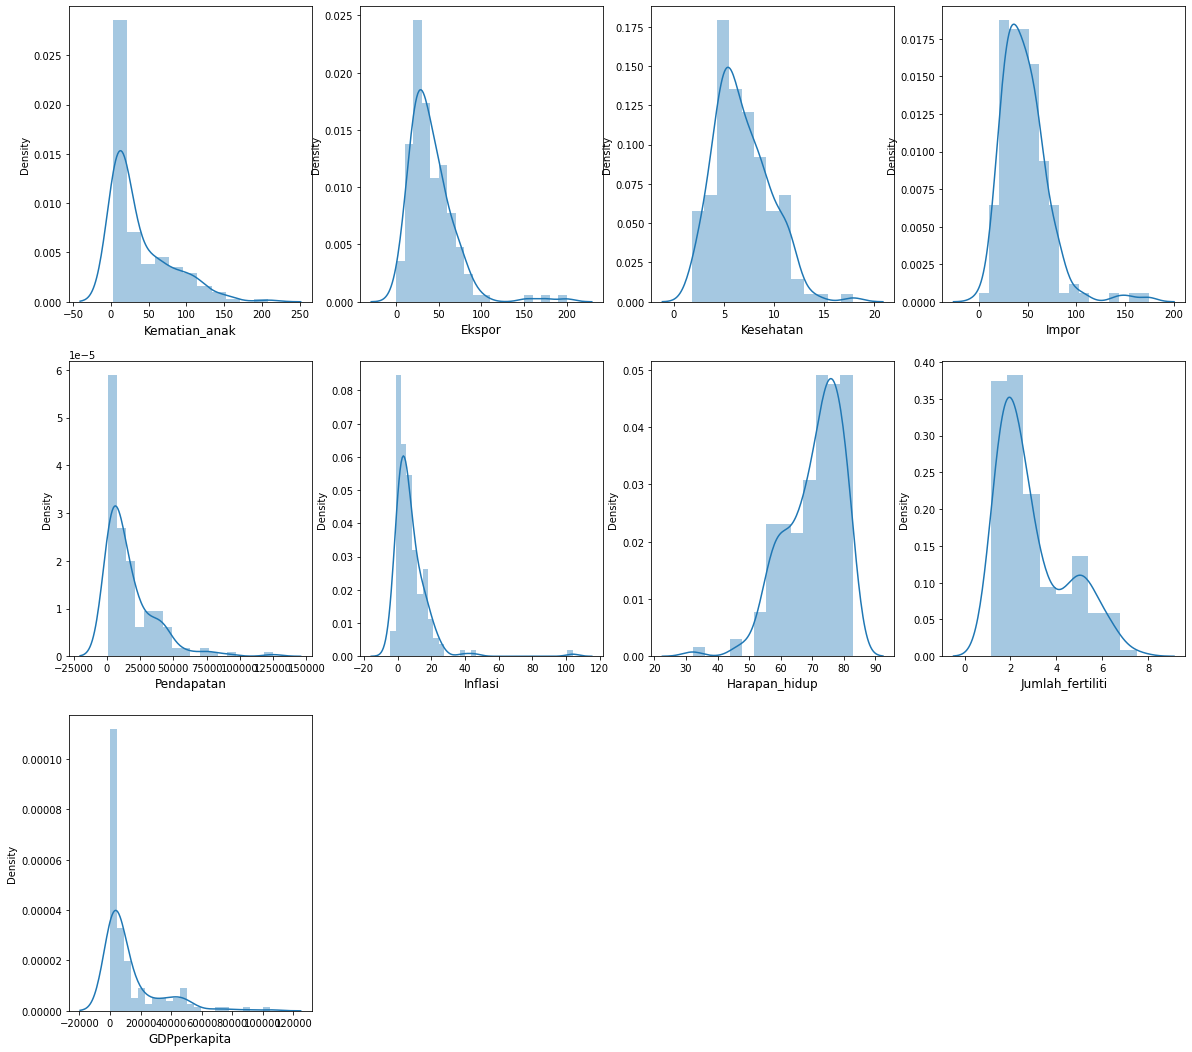

In [9]:
#melihat distribusi normal dataset
plt.figure(figsize=(20,25))
num = 1
for i in df1:
  if num < 10:
    ax = plt.subplot(4, 4, num)
    sns.distplot(df1[i])
    plt.xlabel(i, fontsize=12)
  num += 1
plt.show()

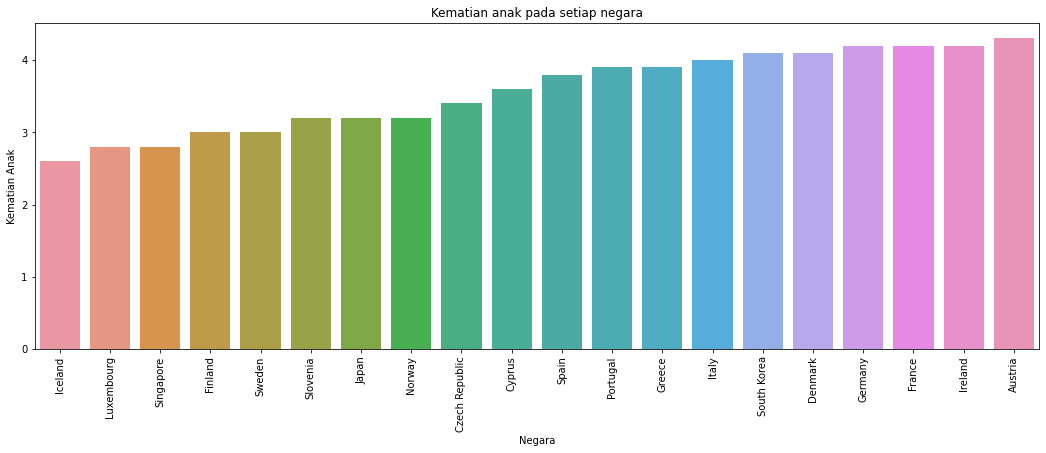

In [10]:
plt.figure(figsize=(18, 6))
kematian_anak = df[['Negara', 'Kematian_anak']].sort_values('Kematian_anak', ascending=True).head(20)
ax = sns.barplot(x='Negara', y='Kematian_anak', data=kematian_anak)
ax.set(xlabel='Negara', ylabel='Kematian Anak')
ax.set_title('Kematian anak pada setiap negara')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [12]:
#Hopkins Score
hopkins_score = round(hopkins(df1), 2)
hopkins_score

0.93

In [13]:
df_cluster = df1

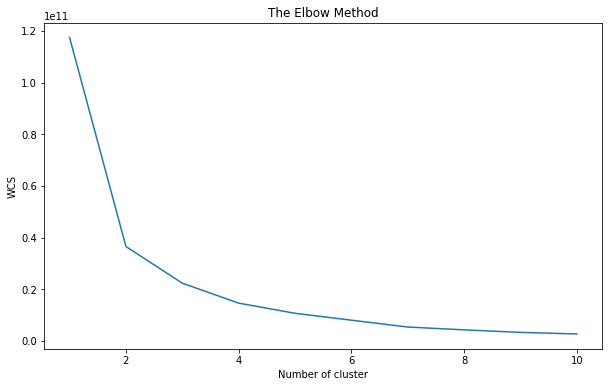

In [14]:
wcs = []
for i in range(1,11):
  kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(df_cluster)
  wcs.append(kmeans1.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcs)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


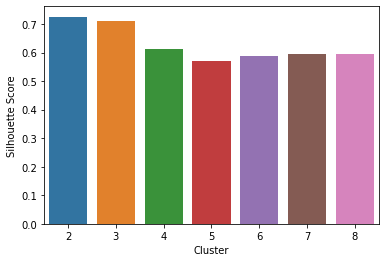

In [15]:
#silhoutte coefficient
from sklearn.metrics import silhouette_score
silhoutte = []

K = []
for i in range(2,9):
  KMean = KMeans(n_clusters=i, init='k-means++', random_state=42).fit_predict(df_cluster)
  silhoutte.append(silhouette_score(df_cluster, KMean))
  K.append(i)

#plotting a bar graph to compare the result
plots = sns.barplot(K, silhoutte)
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [16]:
silhoutte

[0.7256314906273207,
 0.7106457354531156,
 0.6109297437247547,
 0.5710071705649711,
 0.5894073732527259,
 0.5944253756384579,
 0.5964827694227414]

In [63]:
sc = StandardScaler()
df_outlier = sc.fit_transform(df_cluster)
km = KMeans(n_clusters=2, init='k-means++', random_state=42).fit(df_outlier)
labels = km.labels_
df_cluster['Cluster'] = labels

In [64]:
df_cluster

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


n_cluster = 2


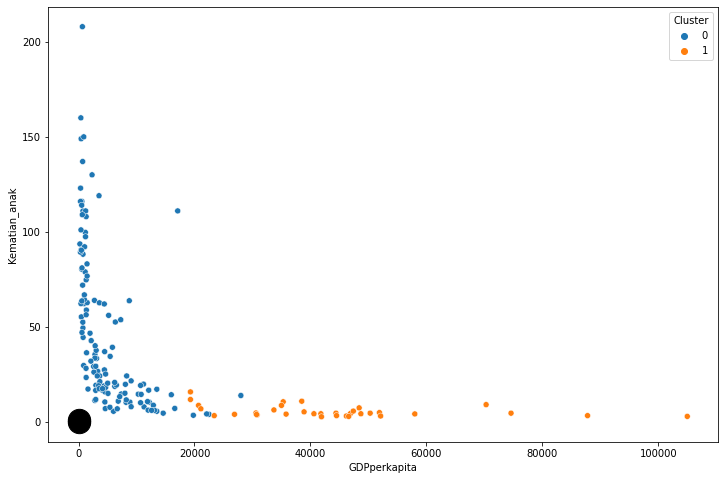

In [66]:
plt.figure(figsize=(12,8))
print('n_cluster = 2')
sns.scatterplot(data= df_cluster, x='GDPperkapita',y= 'Kematian_anak', hue='Cluster', palette='tab10')
#plt.scatter(df_cluster['GDPperkapita'][df_cluster.Cluster==0], df_cluster['Kematian_anak'][df_cluster.Cluster==0], c='blue', s=100, edgecolors='green' )
#plt.scatter(df_cluster['GDPperkapita'][df_cluster.Cluster==1], df_cluster['Kematian_anak'][df_cluster.Cluster==1], c='green', s=100, edgecolors='green' )

center = km.cluster_centers_
plt.scatter(center[:,0], center[:,1], c='black', s=500)
plt.xlabel('GDPperkapita')
plt.ylabel('Kematian_anak')
plt.show()

In [20]:
df_cluster

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [24]:
cluster2 = df_cluster.groupby(['Cluster']).agg({'Kematian_anak':'mean', 
                                                'Ekspor':'mean', 
                                                'Kesehatan':'mean', 
                                                'Impor':'mean', 
                                                'Pendapatan':'mean',
                                                'Inflasi':'mean',
                                                'Harapan_hidup':'mean',
                                                'Jumlah_fertiliti':'mean',
                                                'GDPperkapita':'mean'})
cluster2

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Cluster,,,,,,,,,
0,46.015556,37.586659,6.420296,46.992340,9602.688889,8.713348,68.294074,3.198815,5348.992593
1,5.593750,55.968750,8.483750,46.459375,48962.500000,3.852000,80.096875,1.889688,45090.625000


In [38]:
cluster_negara = pd.concat([df['Negara'],df_cluster], axis=1, join='outer')
cluster_negara.sample(5)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
57,Georgia,16.5,35.0,10.10,52.8,6730,8.55,72.8,1.92,2960,0
117,Panama,19.7,70.0,8.10,78.2,15400,2.59,77.8,2.62,8080,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,1
146,Tajikistan,52.4,14.9,5.98,58.6,2110,12.50,69.6,3.51,738,0
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100,0


In [51]:
print(cluster_negara[cluster_negara.Cluster == 0].Negara.values)
print()
print('Total : ', cluster_negara[cluster_negara.Cluster == 0].Negara.count())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados'
 'Belarus' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Czech Republic' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Fiji'
 'Gabon' 'Gambia' 'Georgia' 'Ghana' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hungary' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya'
 'Lithuania' 'Macedonia, FYR' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova'
 'Mongolia' 'Monte

In [50]:
print(cluster_negara[cluster_negara.Cluster == 1].Negara.values)
print()
print('Total :', cluster_negara[cluster_negara.Cluster == 1].Negara.count())

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Denmark' 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg' 'Netherlands'
 'New Zealand' 'Norway' 'Oman' 'Qatar' 'Saudi Arabia' 'Singapore' 'Spain'
 'Sweden' 'Switzerland' 'United Arab Emirates' 'United Kingdom'
 'United States']

Total : 32
